In [97]:
import numpy as np
import pandas as pd
import datetime as dt
#-Import custom import methods for the csv files-#
from Functions import (  import_csv_BondList,
                        import_csv_BondTimeSeries)
import matplotlib.pyplot as plt

## Bond List

In [98]:
BondListC = import_csv_BondList('DataFrames/BondList.csv')
BondListC['First Issue Date'].head();
mask = (BondListC['First Issue Date'] > dt.datetime(1862,1,1)) & (BondListC['First Issue Date'] < dt.datetime(1872,1,1))

In [99]:
BondListC.loc[mask, :];

The 5-20s bonds were U.S. Treasury bonds that were issued to help finance the Union war effort, which includes supplies, equipment, salaries of soldiers, during the Civil War. The name “5-20s” came from the bond’s nature of maturity; that of a 20 year maturity period that could be redeemed after the span of 5 years. The 5-20s paid a 6 percent coupon, and was authorized for a total amount of 500 million dollars. Congress was able to come towards an agreement to pay coupons in specie, but left the conversation surrounding the redemption of the par value to be decided on a later date. However, it was advertised by Jay Cooke, who has exclusive access to brokering the bonds, to be redeemed with specie as opposed to lawful money (greenbacks) which traded substantially lower.


The 5-20s were sold in denominations of $50, $100, $ 500, $1,000, $5,000, $10,000 to banks, foreign investors, and the public

## Bond Quantity

In [100]:
BondQuantC = import_csv_BondTimeSeries('DataFrames/BondQuant.csv')
BondQuantC.head();

In [101]:
five_twenties = (20101, 'Total Outstanding')
full_period = (BondQuantC.index>dt.datetime(1862,12,1)) & (BondQuantC.index<dt.datetime(1878,12,1))
df_5_20_full = BondQuantC.loc[full_period, five_twenties].ffill() / 1e6

In [102]:
df_5_20_full.head();

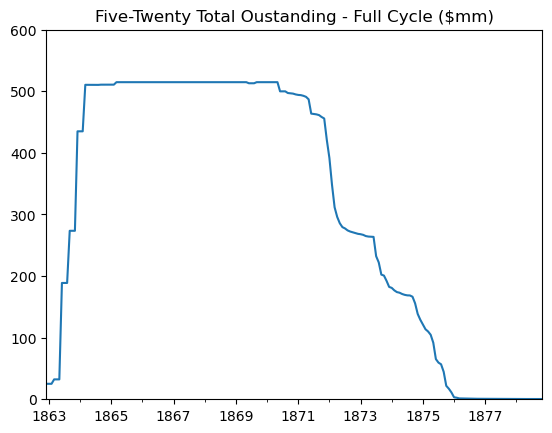

In [103]:
df_5_20_full.plot(title = 'Five-Twenty Total Oustanding - Full Cycle ($mm)', ylim=[0, 600]);
#plt.ylim(0, 600)

Initial sales were slow but picked up pace when Jay Cooke acted as a broker and advertiser, selling the bonds to the public. Starting from 1869, the government retired most of the 5-20s bonds, refinancing them with 4.5 percent, 30 year bonds, and 4 percent, 15 year bonds and by 1877 all the 5-20s were redeemed.

In [104]:
issue_period = (BondQuantC.index>dt.datetime(1862,12,1)) & (BondQuantC.index<dt.datetime(1865,12,1))
df_5_20_issue = BondQuantC.loc[issue_period, five_twenties] / 1e6

In [105]:
issues = df_5_20_issue.dropna()
big = issues.diff()>10
big[dt.date(1862, 12, 31)] = True
big_issues = issues[big]

In [106]:
big = issues.diff()>10

In [107]:
big.shift(-1)

1862-12-31    False
1863-03-31     True
1863-06-30     True
1863-09-30     True
1863-12-31     True
1864-03-31    False
1864-06-30    False
1864-09-30    False
1864-12-31    False
1865-03-31    False
1865-06-30    False
1865-09-30      NaN
Name: (20101, Total Outstanding), dtype: object

In [108]:
big

1862-12-31    False
1863-03-31    False
1863-06-30     True
1863-09-30     True
1863-12-31     True
1864-03-31     True
1864-06-30    False
1864-09-30    False
1864-12-31    False
1865-03-31    False
1865-06-30    False
1865-09-30    False
Name: (20101, Total Outstanding), dtype: bool

In [109]:
issues

1862-12-31     25.126106
1863-03-31     32.305506
1863-06-30    188.834359
1863-09-30    273.517252
1863-12-31    434.997691
1864-03-31    510.487593
1864-06-30    510.385643
1864-09-30    510.720160
1864-12-31    510.771460
1865-03-31    514.771460
1865-06-30    514.638300
1865-09-30    514.638300
Name: (20101, Total Outstanding), dtype: float64

In [110]:
ann = {
    dt.datetime(1862, 11, 30): 25,
    dt.datetime(1863, 3, 31): 32,
    dt.datetime(1863, 6, 30): 188,
    dt.datetime(1863, 9, 30): 273,    
    dt.datetime(1863, 12, 31): 434,    
}

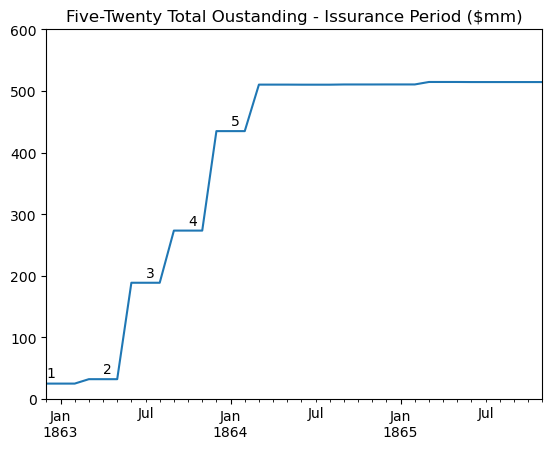

In [111]:
ax = df_5_20_issue.ffill().plot(title = 'Five-Twenty Total Oustanding - Issurance Period ($mm)', ylim=[0, 600]);
for i, k in enumerate(ann):
    ax.annotate(i+1, (k+dt.timedelta(days=30), ann[k]+10))
# for i in range(big_issues.shape[0]):
#     ax.annotate(i+1, (big_issues.index[i-1], big_issues[big_issues.index[i-1]]+10))

1.The 5-20s bonds were authorized for an amount of 500 million dollars in February 1862 but by late September only 2.5 million dollars worth were sold. When the 5-20s bonds were first issued, they were brokered by the government and “auctioned” to bankers. The 5-20s initially struggled to sell due to the size of the debt and the banks demand for higher interest rates than what the government was willing to offer. The data starts from 1863, and is a continuation of the slow trend of bond sales that started when the bond was first issued.
3. May 1st - July 30th
    a. The marked jump in bond sales was in response to financial developments created by Jay Cooke.
        i. The Cooke brothers, through extensive lobbying, passed The National Banking Act of 1863 which required National Banks to issue notes backed by federal and not state bonds. This created enormous demand for the 5-20s bonds in the subsequent months.
        ii. Jay Cooke was given exclusive access to broker the bonds and through his 2,500 salesmen and his brother’s media connections, he marketed the debt to the public using patriotic appeals. 
        iii. In March of 1863, public confidence was at an all time low, and gold was increasing rapidly in “price”, and 5-20s were trading at 94 ½ of its par value. In response Jay Cooke bought every bond selling below par value to boost the government credit. As a result bond sales increased dramatically to a million a day. This increase in demand was so tremendous that “the great difficulty was to obtain enough bonds from the Treasury Department, which in turn was unable to get deliveries from the printers and engravers”.
3. July 30th the September 1st
    a. A combination of war developments and financial developments increased bond sales/
        i. The Battle of Gettysburg was a turning point in the war in favor of a union victory. Investors likely saw the 5-20s as a safer investment.
        ii. On July 1st 1863, legal tender notes could no longer be converted into 5-20s. It was during that same time period when   newspapers around the country, but predominantly the ones owned and influenced by the Cooker brothers, began to frame buying the 5-20s as the “last chance” to cash in on such a deal.
4. September 1st - April 1st 
    a. There were a succession of Union victories from September of 1863 until the year's end.

## some important notes to consider

1. Pulling the strings behind the issuance and brokerage of the 5-20s bonds was Jay Cooke. The success of the 5-20s in raising war-time money is often credited to Salmon P. Chase, however it was Cooke who through intensive lobbying, put Chase in office, and later on Senator Sherman, both who were instrumental in not only creating the 5-20s bonds, but also in passing key bills that facilitated the sale of the bond. There is a general impression among academic papers that Cooke was the mastermind who put political figures into office so that he could profit off the commission of sales (1.6 million).
2. In a letter to a prospective investor, Jay writes "Congress has provided that the Bonds shall be PAID in Gold when due". The 5-20s were advertised to be redeemed for its par value in gold. 

In [112]:
active_mask = BondQuantC.columns.get_level_values('Series') == "Active Outstanding"

In [113]:
outstanding = BondQuantC.loc[:, active_mask]

In [114]:
agg = outstanding.sum(axis=1)

## Bond Price

In [115]:
BondPriceC = import_csv_BondTimeSeries('DataFrames/BondPrice.csv')
#BondPriceC.head()

In [116]:
five_twenties_price = BondPriceC.loc[(BondPriceC.index>dt.datetime(1862,12,1)) & (BondPriceC.index<dt.datetime(1878,12,1)), (20101, 'Average')]

In [117]:
prices = BondPriceC.mean(axis=1)

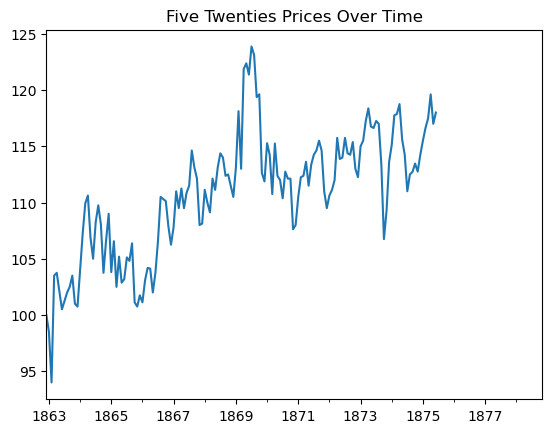

In [118]:
five_twenties_price.plot(title='Five Twenties Prices Over Time');

In the first few years upon issuance, the climb in prices was because the 5-20s were seen as a method of currency exchange (it could be purchased in Greenbacks but was advertised to be redeemable in gold). Thus as the value of greenbacks depreciated the prices of 5-20s rose. In later years, starting from the 1870s, interest rates fell, which made the 5-20s a more attractive investment. 

In [119]:
five_twenties_price2 = BondPriceC.loc[issue_period, (20101, 'Average')]

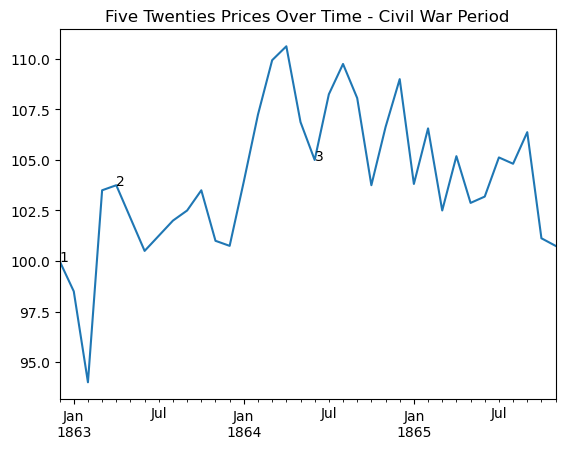

In [122]:
ax2 = five_twenties_price2.plot(title='Five Twenties Prices Over Time - Civil War Period');
# mask_big_moves = five_twenties_price2.diff().abs() > 3
# big_moves = five_twenties_price2[mask_big_moves]
x = [
    dt.datetime(1862, 12, 31), 
    dt.datetime(1863, 4, 30),
    dt.datetime(1864, 6, 30),
] 
for i, d in enumerate(x):
    ax2.annotate(i+1, (d, five_twenties_price2[d]))

1. On January 8 1863 it was made public that congress had increased the supply of Greenbacks by $300 million. This increase in greenback supply would likely lead to inflation, reducing the value of greenbacks relative to specie. Since 5-20 bonds could be bought in greenbacks, and was advertised to be redeemable in specie, their relative value would increase as the value of greenbacks decreased. The news also altered public perceptions of the Union financial situation. It signaled that previous fiscal measures were insufficient in covering Union expenses, and the war would be more expensive than anticipated. Because of the promise of payments in specie, the 5-20 bonds became more attractive. Investors seeking to protect themselves from inflation would prefer bonds that guaranteed returns in a more stable currency rather than the increasingly devalued greenbacks.  
2. In April 27, 1863 the Confederate Treasury Note Act was passed, which- The Confederate Congress authorized the issuance of interest-bearing Treasury notes, known as "Six Per Cent Non-Taxable Bonds." This coupled with a series of Union defeats in April such as the Battle of Plymouth but also tumultous political developments in the Union like the Proclamation of Amnesty and Reconstruction that caused unrest could have resulted in investors prefering Southern bonds and thus crowding out investment for the 5-20s in foreign markets.
3. In June 3rd 1864 the National Banking Act was signed with revisions from the earlier Act of 1863. The difference was a result of a combination of pressure from elite banker Jay Cooke, and revisions in the 1863 act, which forced New York City banks which held a lion's share of the country's capital, into complying with the act (increasing demand for the 5-20s substantially).


## Some observations

Interestingly, bond prices seem to be more sensitive towards developments in government actions or in the finance industry as opposed to developments in the war, with the exception of the Battle of Gettysburg. That is because regardless of the outcome of the war, the Union was going to persist, with or without the Confederate States. But the Battle of Gettysburg was the first well publicized turning point in a war that was previously in a stalemate. This victory signaled to investors that the war was progressing faster which meant the government could sooner stop borrowing and start paying back investors.

One of the biggest incongruencies on the graph that we are still investigating, is Early’s failed raid on the White house. Jubal Early’s army reached within five miles of the White House by July 11th. This created an uproar among Union states, the Washington Evening Star on July 10th wrote “The excitement in this city is intense and on the increase. Crowds are thronging the bulletin boards, and a thousand wild and improbable rumors are in circulation”. We know that this news struck deep within the financial community, because this resulted in the largest shift of the entire war for Greenbacks, a change of 4.8 percent which dwarfed the next largest 2.6 percent. 

## How did fiscal discrimination of the 520 bonds influence how the public viewed the two “sides” of the Civil War? And what about the status of the economy as a whole?

The 5-20 bonds, when issued, was ambiguous as to whether it would be redeemed in greenbacks or specie. As a result, following the war, a strong debate arose regarding whether these bonds needed to be paid back in more valued gold. This question of payment caused huge anxiety among the general public and various opinions related to the long-term effects of the Civil War came up. The middle-class veterans who were holders of these bonds and who anticipated their returns in gold felt overwhelmed when suddenly an overriding effort was realized to pay the military pensions in greenback. This grew distrust in financial leaders, and their ability to honor their promises.


In congressional debates, Republicans supported redemption in specie, arguing its benefits for bolstering government credit which made debt refinancing more affordable amidst lower interest rates. Conversely, Democrats advocated for redemption in greenbacks, emphasizing immediate savings on government expenditures.


The differential yield between greenbacks and gold paying interest was one that had been brought to the limelight first and foremost, as the gold paying interest paid a higher return due to the face value of gold being greater than the greenbacks. As this continued, the complexity of the dollar loss increased over time for bondholders, especially greenbacks, exposing them to more fluctuations in interest rates. Moreover, to those who favored the Confederacy, financial policy had come to symbolize an economic exploitation by the North. The demand for gold-only payments simply deepened their unfavorable opinion of the Union's motives and its actions during and following the war. To the supporters of the Confederacy, in fact, the financial approach by the Union was nothing but currency trading between gold and greenback values by Northern financiers.


Dispute over how to redeem the greenbacks made the economy unstable, for it gave holders of these greenbacks a probability that their value investors would be devalued. As a result, consumer confidence and spending were reduced. The vaguely defined character of the bond redemption terms increased the effective sovereign risk and further depressed overall market confidence in US government debt and generated skepticism about future economic policies.


## How Did the 5-20 Bonds Influence Post-War Reconstruction and Economic Recovery?

The huge issuance of 5-20 bonds added much to the national burden of debt. This attributed to the credit spread for US government bonds vis-à-vis other sovereign debts would have portrayed the perceived creditworthiness and risks associated with the US during reconstruction. 


A major share of the funds from the 5-20 bonds was instrumental in repairing the war-ravaged South. These were imperative in restoring facilities and getting economic activities going. The bonds made available the required capital for various strategically important infrastructure-based projects, thus giving impetus to economic growth and employment.


Plans the government had in place to redeem and refinance the 5-20 bonds kept the national debt in check. The graphs trace the different outstanding bonds from over $500 million in 1865 to almost nothing in 1877. Furthermore, effective redemption combined with strategic issuance reduced refinancing risk and played a big part in stabilizing the economy. The government was able to redeem and refinance all the 5-20s well before the maturity date. Redemption of 5-20s bonds began as early as 1867, a mere five years after the issuance. Tthe U.S. government was able to redeem the bonds through surplus revenues and was part of the general stabilizing process regarding the national economy and the transition of the country's economy from financing the war to peacetime economic policies. Starting from 1870 the government retired most of the 5-20s bonds, refinancing them with 4.5 percent, 30 year bonds, and 4 percent, 5 year bonds and by 1877 all the 5-20s were redeemed.



Eventually, what did restore confidence among both domestic and international investors toward further investment to drive economic growth was the repayment of bonds in gold, which was decided in 1869. The reduction in risk premium for U.S. government bonds showed improvement in investor confidence and the perceived stability in the U.S. financial system.The gradual reduction of outstanding bonds and the stabilization of the price for bonds suggested that the government got things quite right in the sphere of economic stabilization and fiscal discipline. The decision for repayment in gold was an incidental, but quite crucial, factor of monetary policy in influencing inflation expectations and thus currency stability.


Newman, P. (2018). "The Origins of the National Banking System: The Chase-Cooke Connection and the New York City Banks." The Independent Review, 22(3), 383-401. Published by Independent Institute. Retrieved from JSTOR.

Rothbard, M. N. (2002). History of Money and Banking in the United States: The Colonial Era to World War II. Ludwig von Mises Institute. Retrieved from Mises Institute.

Wikipedia contributors. "Economic history of the American Civil War." Wikipedia, The Free Encyclopedia, 2024. Available at Wikipedia.

Abernathy, C., et al. (2018). "Reconstruction." The American Yawp, Stanford University Press. Available at The American Yawp.

Abernathy, C., et al. (2018). "The Civil War." The American Yawp, Stanford University Press. Available at The American Yawp.

Bayley, R. (1869). "The National Debt of the United States." Economic Journal, 29(2), 220-240. Retrieved from your Dropbox.

Foner, E. 1988. Reconstruction: America's Unfinished Revolution, 1863–1877. New York: HarperCollins Publishers.

Blight, D. 2001. Race and Reunion: The Civil War in American Memory. Cambridge, MA: Harvard University Press.

Higgs, R. 1987. "Crisis and Leviathan: Critical Episodes in the Growth of American Government." New York: Oxford University Press.

McPherson, J. M. 1988. Battle Cry of Freedom: The Civil War Era. New York: Oxford University Press.

Ransom, R. L. (1989). Conflict and Compromise: The Political Economy of Slavery, Emancipation, and the American Civil War. Cambridge University Press.

Richardson, H. C. (2001). The Death of Reconstruction: Race, Labor, and Politics in the Post–Civil War North, 1865–1901. Harvard University Press.

Studenski, P., & Krooss, H. E. (1952). Financial History of the United States. McGraw-Hill Book Company, Inc.

Mitchell, B. R. (1962). Abstract of British Historical Statistics, Cambridge University Press. (For comparative analysis of post-war economies.)


In [105]:
##five_twenties_price2

##x = [dt.date(1862, 12, 31), dt.date(1863, 2, 28)]


In [106]:
##five_twenties_price2[dt.datetime(1862, 12, 31)]

In [108]:
##ive_twenties_price2.index